<a href="https://colab.research.google.com/github/maktaurus/ML-Work/blob/main/Classic_Algorithams/Naives_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naives Bayes**

Named after Thomas Bayes.

The classifier assumes that the features used to describe an observation are conditionally independent, given the class label.

Naives Bayes Algorithams:

1) Multinomial Naives Bayes: used for dicrete features (e.g. text classification)

2) Gaussian Naives Bayes: Used for continuous features (e.g. Image Classification)

3) Bernoulii: Used for binary features (e.g. spam vs Non-spam emails)

It is a probabilistic classifier. It is because it assumes that one feature in the model is independent of existence of another feature.

To work with Naives Bayes Classifier data needs to be balanced.

In [ ]:
import pandas as pd
import glob
import zipfile
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!kaggle datasets download uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
100% 211k/211k [00:00<00:00, 546kB/s]
100% 211k/211k [00:00<00:00, 546kB/s]


In [ ]:
zipfile.ZipFile("/content/sms-spam-collection-dataset.zip").extractall()

In [ ]:
data = pd.read_csv("/content/spam.csv",encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [ ]:
data = data[["v2","v1"]]
data.head()

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
data.dropna(inplace=True)

In [ ]:
data["v1"].value_counts()

,count
v1,
ham,4825
spam,747


In [ ]:
data["v1"] = data["v1"].map({"ham":0,"spam":1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      5572 non-null   object
 1   v1      5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.head()

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data["v2"],data["v1"],test_size=0.2,random_state=42,stratify=data["v1"])

In [ ]:
vectorizer = CountVectorizer(stop_words="english")
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
x_train.toarray().shape

(4457, 7440)

In [ ]:
y_train.value_counts()

,count
v1,
0,3859
1,598


In [ ]:
x_test.toarray().shape

(1115, 7440)

In [ ]:
y_test.value_counts(normalize=True)

,proportion
v1,
0,0.866368
1,0.133632


**Fit the Model**

In [ ]:
cls = MultinomialNB()
cls.fit(x_train,y_train)

MultinomialNB()

In [ ]:
cls.score(x_test,y_test)

0.9838565022421525

In [ ]:
confu_matrix = confusion_matrix(y_test,cls.predict(x_test))
confu_matrix

array([[960,   6],
       [ 12, 137]])

<Axes: >

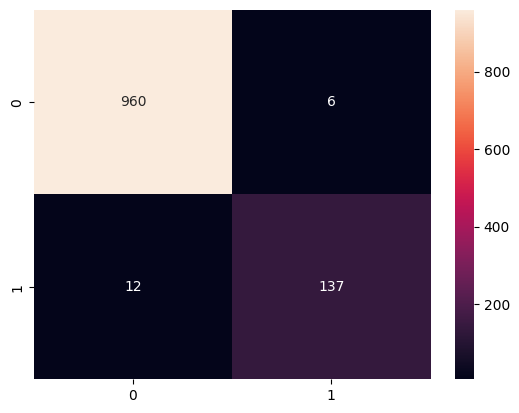

In [ ]:
sns.heatmap(confu_matrix,annot=True,fmt="d")


### **Accuracy:**
 The ratio of correctly predicted instances to the total instances.
Formula: Accuracy=Total InstancesTrue Positives+True Negatives​

Use Case: Useful when the classes are balanced.



### **Precision:**
 The ratio of correctly predicted positive observations to the total predicted positives.
Formula: Precision=True Positives+False PositivesTrue Positives​

Use Case: Important when the cost of false positives is high.



### **Recall (Sensitivity):**
 The ratio of correctly predicted positive observations to all observations in the actual class.
Formula: Recall=True Positives+False NegativesTrue Positives​

### **F1 Score:**
 The harmonic mean of precision and recall.

 Use Case: Useful when you need a balance between precision and recall.

In [ ]:
print(classification_report(y_test,cls.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

